In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import linregress

In [ ]:
# Reading CSV files into dataframes
daily_activity_df = pd.read_csv("dailyActivity_merged (1).csv")
fitbit_df = pd.read_csv("FitBit data.csv")

#check DataFrames 
daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
#merging the DataFrames by rows (vertically)
merged_df = pd.concat([daily_activity_df, fitbit_df], ignore_index=True)
merged_df.head()
data_df = merged_df

In [ ]:
# find the duplicate rows by  ID, activity date and total distance
duplicate_df = merged_df[merged_df.duplicated(subset=["Id", "ActivityDate", "TotalSteps"])]

# Remove duplicates from the original data based on specific columns
cleaned_data = merged_df.drop_duplicates(subset=['Id', 'ActivityDate', 'TotalSteps'])

# duplicate_df.to_csv("duplicates.csv", index=False)
# cleaned_data.to_csv("cleaned_data.csv", index=False)

cleaned_data.shape

# Print the number of unique fitbit users in the merged and cleaned dataset
no_fitbit_users = len(cleaned_data["Id"].unique())

print(f"No. of unique Fitbit users: {no_fitbit_users} Rows and Columns: {cleaned_data.shape}")

No. of unique Fitbit users: 35 Rows and Columns: (1397, 15)


In [ ]:
# Convert 'ActivityDate' to datetime
data_df['ActivityDate'] = pd.to_datetime(data_df['ActivityDate'])
data_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


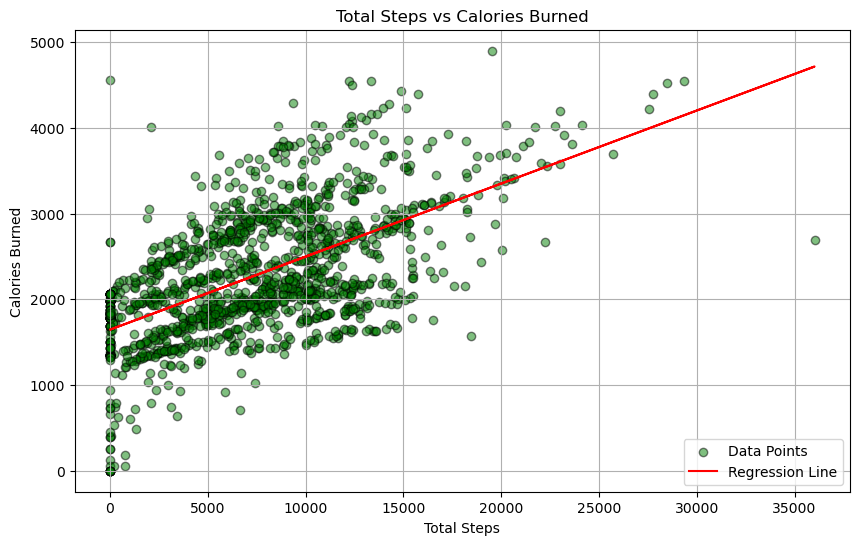

In [ ]:
# Scatter plot Total Steps vs Calories with regression line (Q1) - Sima Moghadam
plt.figure(figsize=(10, 6))
plt.scatter(data_df['TotalSteps'], data_df['Calories'],marker="o", color="green",edgecolor="black",alpha=0.5, label='Data Points')
plt.title('Total Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data_df['TotalSteps'], data_df['Calories'])
plt.plot(data_df['TotalSteps'], slope * data_df['TotalSteps'] + intercept, color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.savefig('plots\Steps_Calories.png')
plt.show()


Sima Moghadam
Analysis:

This scatter plot shows the relationship between Total Steps and Calories Burned. Each point represents a day's data, plotting the total number of steps against the calories burned. There is a positive correlation, meaning that as the number of steps increases, the calories burned generally increases as well.
The red regression line highlights this trend. Most data points cluster between 0 and 15,000 steps and 1,000 to 3,000 calories, suggesting typical activity levels for most users. Outliers with high steps but lower calories burned indicate differences in activity intensity or individual metabolism.
This variability suggests that personalized fitness plans could help optimize results. Different users burn different calories for the same number of steps due to factors like weight, age, and fitness level. Personalized coaching or feedback based on individual activity patterns could help users optimize their exercise routines for better results.

Hypothesis:

Null Hypothesis (H₀): There is no significant relationship between TotalSteps and Calories burned.

Alternative Hypothesis (H₁): There is a significant positive relationship between TotalSteps and Calories burned, indicating that as TotalSteps increase, Calories burned also increase.

Regression Analysis:

Dependent variable (response variable): Calories
Independent variable (predictor variable): TotalSteps

This is a one-tailed test because we are specifically checking if an increase in steps leads to an increase in calories burned, not just any possible relationship between steps and calories.


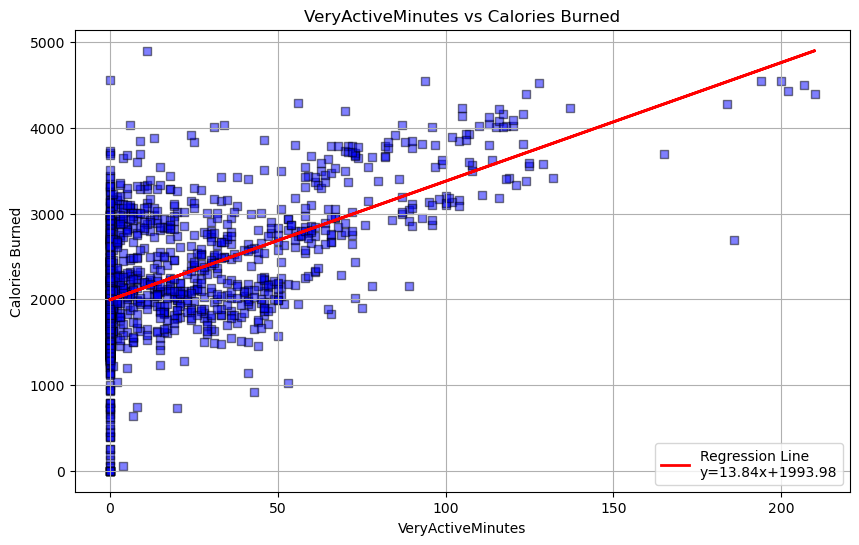

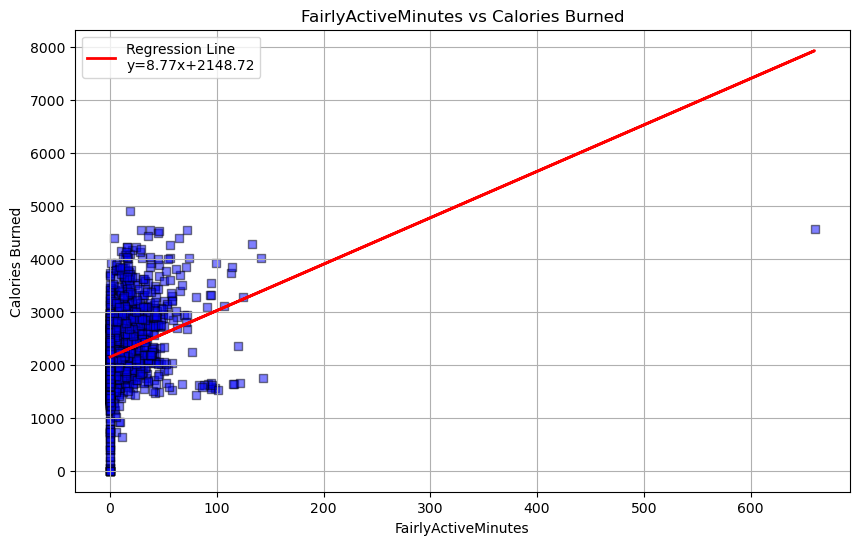

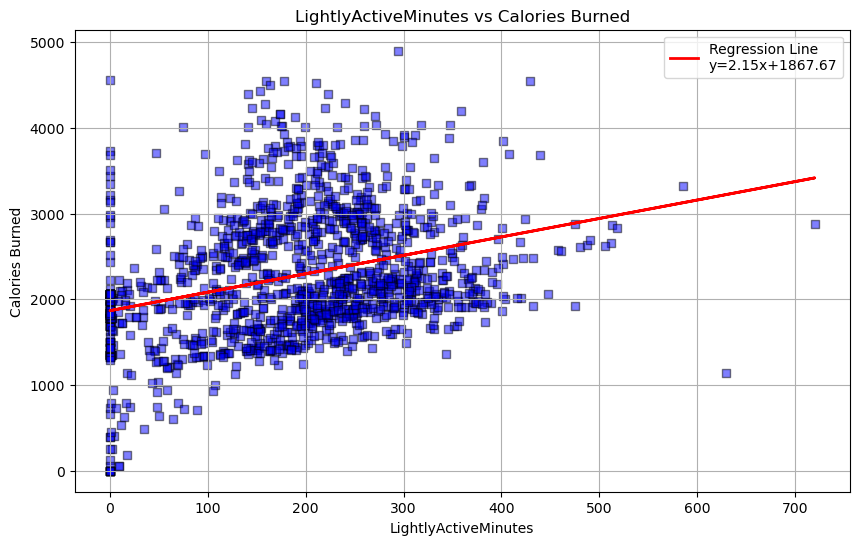

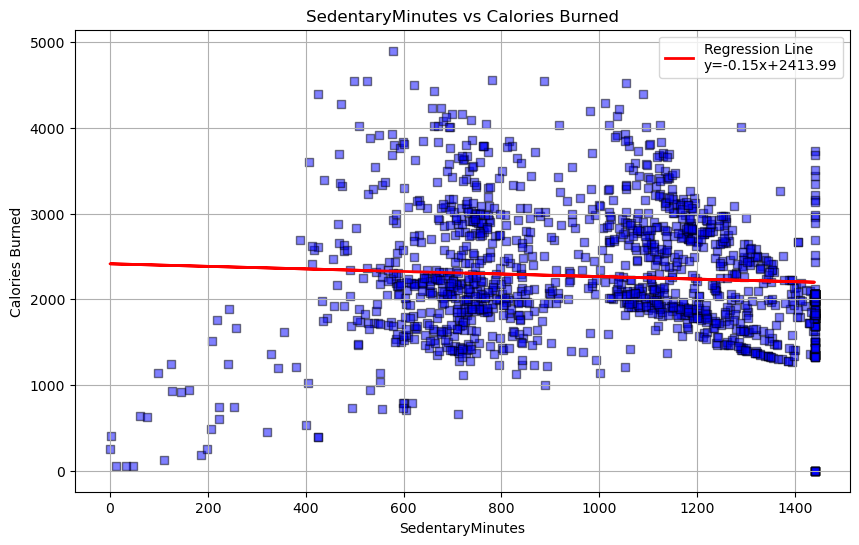

In [ ]:
# Scatter plots for each activity vs Calories (Q2) - Sima Moghadam
activities = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

for activity in activities:
    plt.figure(figsize=(10, 6))
    plt.scatter(data_df[activity], data_df['Calories'], marker="s", color="blue", edgecolor="black", alpha=0.5)
    
    # Calculate the regression line of best fit
    slope, intercept = np.polyfit(data_df[activity], data_df['Calories'], 1)
    regression_line = slope * data_df[activity] + intercept
    
    plt.plot(data_df[activity], regression_line, color="red", linewidth=2, label=f'Regression Line\ny={slope:.2f}x+{intercept:.2f}')
    
    plt.title(f'{activity} vs Calories Burned')
    plt.xlabel(activity)
    plt.ylabel('Calories Burned')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'plots/{activity}.png')
    plt.show()

Sima Moghadam
Analysis

These scatter plots illustrate the relationship between different activity levels and calories burned. Each plot represents a specific activity type: Very Active Minutes, Fairly Active Minutes, Lightly Active Minutes, and Sedentary Minutes. The blue squares represent the data points for each day, showing the minutes spent in the specific activity against the calories burned.

For each activity type, there is a red regression line that shows the overall trend between the activity minutes and calories burned. The slope and intercept of the regression line are displayed on each plot, indicating the strength and direction of the relationship.

Very Active Minutes vs Calories Burned: There is a strong positive correlation, meaning that as very active minutes increase, the calories burned also increase significantly. This is expected as intense physical activity burns more calories.

Fairly Active Minutes vs Calories Burned: There is a positive correlation, although not as strong as very active minutes. Moderate activity also contributes to calories burned, but less intensely.

Lightly Active Minutes vs Calories Burned: The correlation is weaker compared to very active and fairly active minutes. Light activities burn fewer calories, but there is still a positive trend.

Sedentary Minutes vs Calories Burned: The correlation is weak or even slightly negative, indicating that more sedentary time does not contribute significantly to calorie burning. In fact, spending more time sedentary might correlate with burning fewer calories overall.

Hypotheses:

Null Hypothesis (H₀): All activities (Very Active, Fairly Active, Lightly Active, Sedentary) contribute equally to calorie burn.

Alternative Hypothesis (H₁): One or more specific activities (e.g., Very Active) contribute significantly more or less to calorie burn compared to others.

Regression Analysis:

In regression analysis, where the dependent variable (response variable) is Calories, and the independent variables (predictor variables) are VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and SedentaryMinutes, we will test whether there is evidence to reject the null hypothesis in favor of the alternative hypothesis. This will help determine if any specific activity level has a statistically significant effect on calorie burn compared to others.

This is a two-tailed test because we are examining whether any specific activity, such as Very Active, contributes more or less to calorie burn compared to other activities, rather than just checking for a difference in one direction.


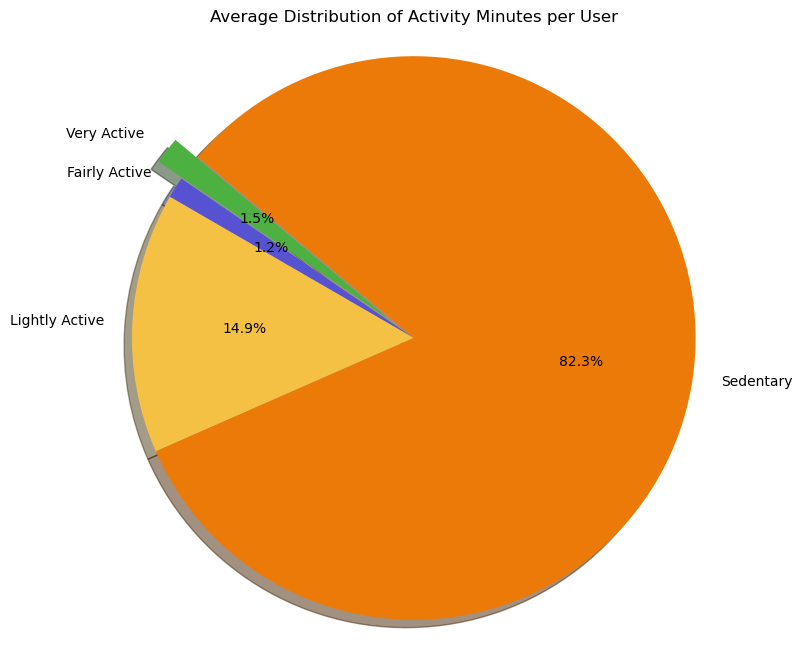

In [ ]:
# Group by 'Id' and calculate the mean activity minutes for each user(Q3) - Sima Moghadam
grouped_df = data_df.groupby('Id').mean()

# Calculate total (mean) minutes for each activity type
total_very_active = grouped_df['VeryActiveMinutes'].mean()
total_fairly_active = grouped_df['FairlyActiveMinutes'].mean()
total_lightly_active = grouped_df['LightlyActiveMinutes'].mean()
total_sedentary = grouped_df['SedentaryMinutes'].mean()

# Pie chart
labels = ['Very Active', 'Fairly Active', 'Lightly Active', 'Sedentary']
sizes = [total_very_active, total_fairly_active, total_lightly_active, total_sedentary]
colors = ['#4CB140','#5752D1','#F4C145','#EC7A08']
explode = (0.1, 0, 0, 0)  # explode the 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Average Distribution of Activity Minutes per User')
plt.axis('equal') 
plt.savefig('plots/activity_minutes.png')
plt.show()



Sima Moghadam
Analysis
This pie chart displays the average distribution of activity minutes per user, categorized into four types: Very Active, Fairly Active, Lightly Active, and Sedentary. The data was grouped by user ID, and the mean activity minutes for each category were calculated to represent the average activity levels.

Very Active Minutes: This category is shown in green and has the highest emphasis with a slight "explosion" in the chart. It accounts for a small percentage of the total activity time, highlighting that users spend less time in very intense activities.

Fairly Active Minutes: Represented in blue, this category makes up a moderate portion of the activity distribution. Users spend a fair amount of time in moderately intense activities.

Lightly Active Minutes: Shown in yellow, this category forms a significant part of the pie, indicating that users frequently engage in light activities throughout the day.

Sedentary Minutes: Represented in orange, this category takes up the largest portion of the pie, indicating that users spend most of their time being sedentary.

The chart shows that while users do engage in various levels of physical activity, the majority of their time is spent being sedentary, followed by light activities. More intense activities like very active and fairly active minutes account for a smaller share. This distribution suggests that there may be opportunities to encourage users to increase their very active and fairly active minutes to achieve better health outcomes.

hypothesis: 

Null Hypothesis (H₀): The activity levels (Very Active, Fairly Active, Lightly Active, Sedentary) are evenly distributed based on activity minutes.

Alternative Hypothesis (H₁): There is a skewed distribution where one or more activity levels account for a significantly higher or lower percentage of total activity minutes compared to others.

test result as below


In [ ]:
print(grouped_df.dtypes)

ActivityDate                datetime64[ns]
TotalSteps                         float64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                  float64
FairlyActiveMinutes                float64
LightlyActiveMinutes               float64
SedentaryMinutes                   float64
Calories                           float64
dtype: object


In [ ]:
# Perform pairwise t-tests for each pair of activity types - Sima Moghadam
t_tests = {}

# Iterate over pairs of columns and perform t-tests
for i, col1 in enumerate(grouped_df.columns):
    for col2 in grouped_df.columns[i+1:]:
        if grouped_df[col1].dtype == 'datetime64[ns]' or grouped_df[col2].dtype == 'datetime64[ns]':
            continue  # Skip datetime columns for t-tests
        t_stat, p_value = ttest_ind(grouped_df[col1], grouped_df[col2])
        t_tests[f"{col1} vs {col2}"] = (t_stat, p_value)

# Print the results
for pair, (t_stat, p_value) in t_tests.items():
    print(f"T-test for {pair}: t-statistic = {t_stat}, p-value = {p_value:.4f}")

T-test for TotalSteps vs TotalDistance: t-statistic = 10.948841581742665, p-value = 0.0000
T-test for TotalSteps vs TrackerDistance: t-statistic = 10.948939908897932, p-value = 0.0000
T-test for TotalSteps vs LoggedActivitiesDistance: t-statistic = 10.95642949000478, p-value = 0.0000
T-test for TotalSteps vs VeryActiveDistance: t-statistic = 10.954611809733839, p-value = 0.0000
T-test for TotalSteps vs ModeratelyActiveDistance: t-statistic = 10.955896295239564, p-value = 0.0000
T-test for TotalSteps vs LightActiveDistance: t-statistic = 10.951878232104287, p-value = 0.0000
T-test for TotalSteps vs SedentaryActiveDistance: t-statistic = 10.95670872866958, p-value = 0.0000
T-test for TotalSteps vs VeryActiveMinutes: t-statistic = 10.926942515187822, p-value = 0.0000
T-test for TotalSteps vs FairlyActiveMinutes: t-statistic = 10.93334228878976, p-value = 0.0000
T-test for TotalSteps vs LightlyActiveMinutes: t-statistic = 10.668452945177641, p-value = 0.0000
T-test for TotalSteps vs Sedent

Sima Moghadam
T-testing results: 

All p-values are very low (0.0000), suggesting strong evidence against the null hypothesis.
This indicates significant relationships between each pair of activity metrics tested, such as TotalSteps vs TotalDistance, TotalSteps vs Calories, etc.

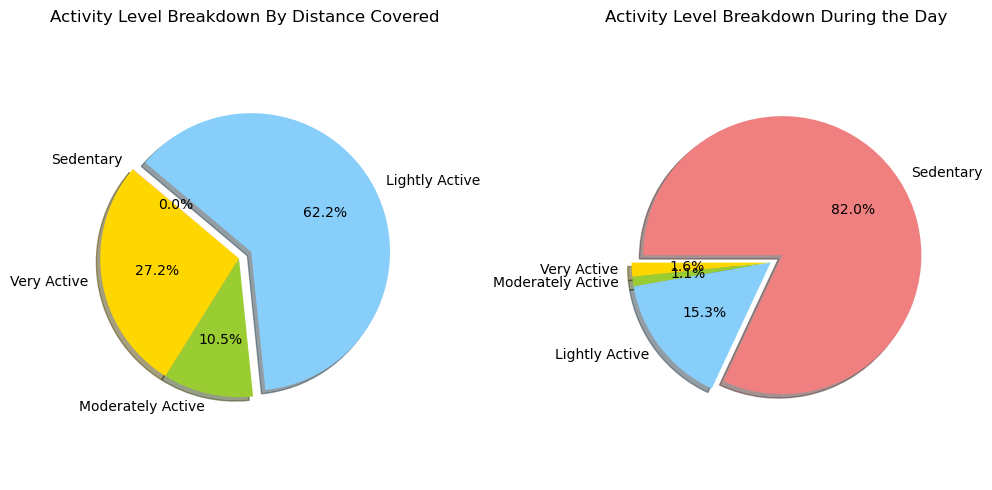

In [ ]:
# Generate a pie plot showing the distribution of logged minutes by activity level
very_active_dist = cleaned_data["VeryActiveDistance"].mean()
mod_active_dist = cleaned_data["ModeratelyActiveDistance"].mean()
lightly_active_dist = cleaned_data["LightActiveDistance"].mean()
sedentary_dist = cleaned_data["SedentaryActiveDistance"].mean()
dist_means = [very_active_dist, mod_active_dist, lightly_active_dist, sedentary_dist]

very_active_mins = cleaned_data["VeryActiveMinutes"].mean()
mod_active_mins = cleaned_data["FairlyActiveMinutes"].mean()
lightly_active_mins = cleaned_data["LightlyActiveMinutes"].mean()
sedentary_mins = cleaned_data["SedentaryMinutes"].mean()
mins_means = [very_active_mins, mod_active_mins, lightly_active_mins, sedentary_mins]

labels = ["Very Active", "Moderately Active", "Lightly Active", "Sedentary"]
colors = ['gold', 'yellowgreen', 'lightskyblue', 'lightcoral']
explode1 = (0, 0, 0.1, 0) # explode largest
explode2 = (0, 0, 0, 0.1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(dist_means, explode=explode1, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Activity Level Breakdown By Distance Covered")

plt.subplot(1, 2, 2)
plt.pie(mins_means, explode=explode2, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.title("Activity Level Breakdown During the Day")

plt.tight_layout()
plt.show()

### Time-based Analysis of Pie Chart
When exploring the data from a time-based perspective, we are looking closely at the 'Very Active' and 'Moderately Active' sections of the pie chart to the right. Using the minutes engaged in these activities over the course of a week, we can compare it to the 150 minutes of moderate intensity exercise as recommended per the Australian health guidelines. This will be useful when analysing the inital proposal of whether Fitbit inspires people to meet exercise guideline (a bit further down in the code).
________________________________________________________________________________________________________________________

### Time-based Analysis Question
**Question**
Is there a relationship between time spent engaging in exercise mid-week and weekends?

**Hypothesis** 
If most adults work mid-week they will engage in exercise more on weekends compared to weekdays.

**Null Hypothesis** 
There is no significant difference in average minutes engaged in exercise between weekdays and weekends.

**Alternative Hypothesis** 
There is an increase in average minutes engaged in exercise on weekends compared to weekdays.

In [ ]:
# Check the data type of the column
data_type = cleaned_data["ActivityDate"].dtype
data_type_ID = cleaned_data["Id"].dtype
data_type_ID

# Convert to datetime to identify days of the week
cleaned_data["ActivityDate"] = pd.to_datetime(cleaned_data['ActivityDate'])
data_type = cleaned_data["ActivityDate"].dtype
data_type_ID

dtype('int64')

In [ ]:
# Add another column called DayOfWeek (where 0-4 is mid-week and 5+6 is weekend)
cleaned_data["DayOfWeek"] = cleaned_data["ActivityDate"].dt.dayofweek
# Sum columns 11, 12 and 13
cleaned_data["TotalActiveMin"] = cleaned_data["VeryActiveMinutes"] + cleaned_data["FairlyActiveMinutes"] \
    + cleaned_data["LightlyActiveMinutes"]

cleaned_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,267


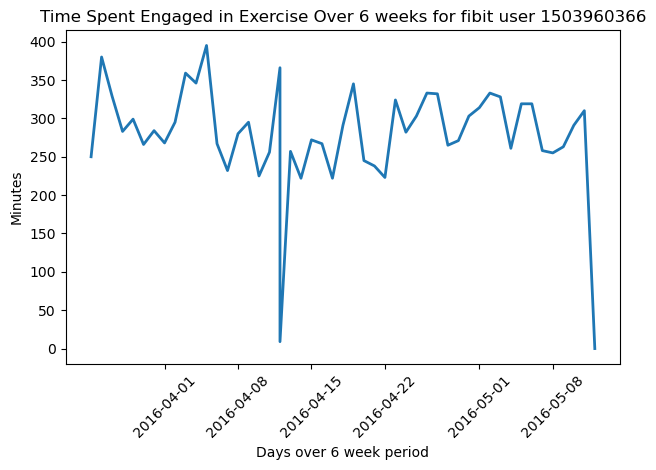

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
940,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,4,250
941,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,5,380
942,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,6,329
943,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,0,283
944,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,1,299


In [ ]:
# Plot TotalSteps over time on line graph for a single user
single_user = cleaned_data.loc[(cleaned_data["Id"] == 1503960366)].sort_values(by="ActivityDate")

plt.plot(single_user["ActivityDate"], single_user["TotalActiveMin"], linestyle="-", linewidth=2)
plt.title("Time Spent Engaged in Exercise Over 6 weeks for fibit user 1503960366")
plt.xlabel("Days over 6 week period")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

single_user.head()

### Time-based Line Graph Analysis
In this graph you can see a single user's average active minutes over the course of the 6 weeks.

The correlation between time engaged in exercise over time: PearsonRResult(statistic=0.06722308709896352, pvalue=0.01196566609867824)


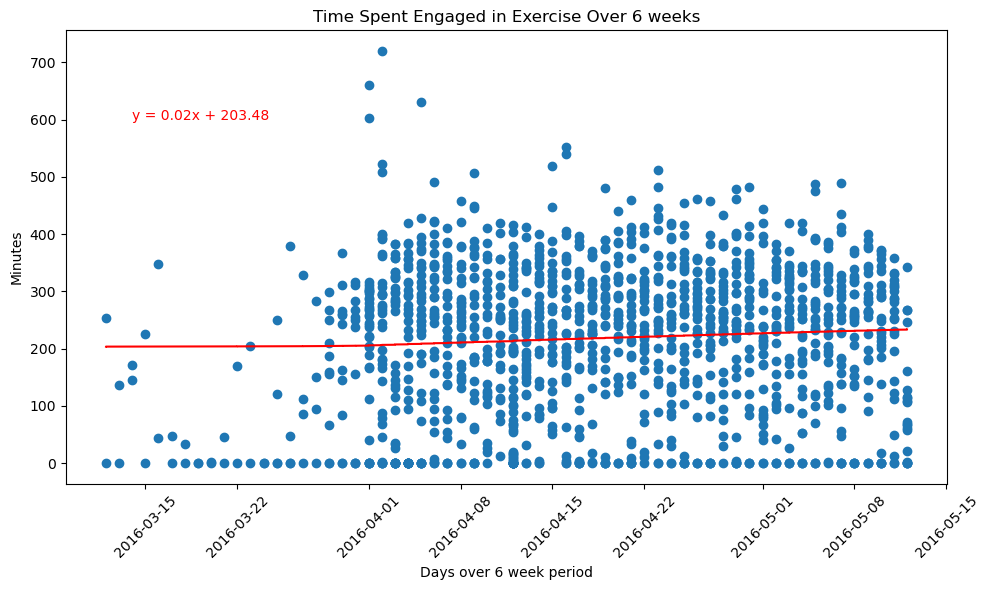

In [ ]:
# Plot TotalSteps over time on scatter plot for all users
sorted_df = cleaned_data.sort_values(by='ActivityDate')
x_data = range(len(sorted_df))
corr_coeff = stats.pearsonr(x_data, sorted_df["TotalActiveMin"])
print(f"The correlation between time engaged in exercise over time: {corr_coeff}")

# Perform a linear regression on mouse weight versus tumor size
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_data, sorted_df["TotalActiveMin"])

# Create equation of line 
trend_line = slope * x_data + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.figure(figsize=(10, 6))
plt.scatter(sorted_df["ActivityDate"], sorted_df["TotalActiveMin"])

plt.plot(sorted_df["ActivityDate"], trend_line, "r-")
plt.annotate(line_eq,(sorted_df["ActivityDate"].iloc[5],600),fontsize=10,color="red")

plt.title("Time Spent Engaged in Exercise Over 6 weeks")
plt.xlabel("Days over 6 week period")
plt.ylabel("Minutes")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Time-based Analysis of Scatter Plot
Looking at trends over time, multiple Fitbit user's "active minutes" over the course of the 6 week study engaged in roughly 200 minutes of activity. Some exercised more vigourously than others and some walked faster to achieve their 10,000 steps a day. There is a very weak positive correlation '0.0672'. This suggests that as the Fitbit study progressed, users increased their number of active minutes, but mildly.
The p-value '0.0119' is less than the significance level of 0.05 and this also suggests that the correlation coefficient is statistically significant, although weak between the number of days in the study and the daily active minutes.

In [ ]:
# Group by day of the week
avg_daily_min = cleaned_data.groupby("DayOfWeek")["TotalActiveMin"].mean()

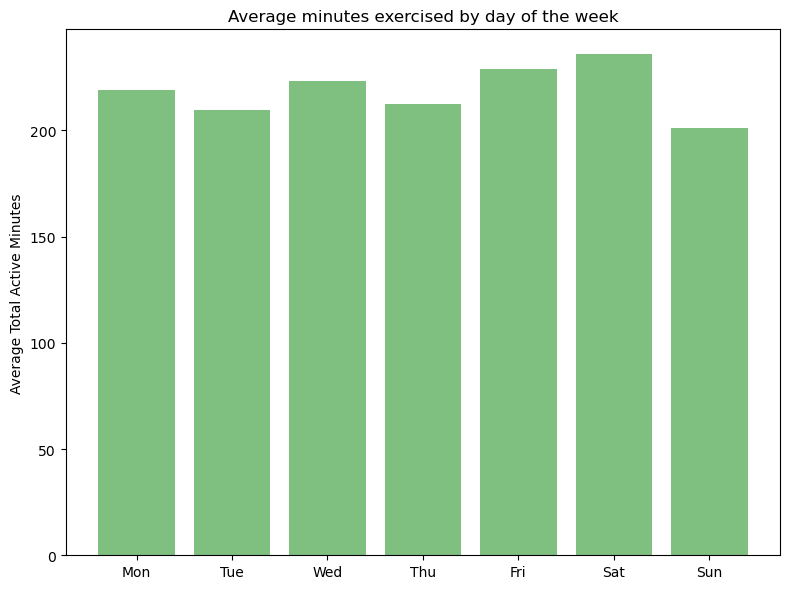

In [ ]:
# Create bar chart to show the average minutes exercised by day of the week
plt.figure(figsize=(8,6))

plt.bar(avg_daily_min.index, avg_daily_min.values, color=["green"], alpha=(0.5))

plt.ylabel("Average Total Active Minutes")
plt.title("Average minutes exercised by day of the week")
plt.xticks(avg_daily_min.index, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.tight_layout()
plt.show()

### Time-based Analysis of Bar Chart
Looking at trends over time when exploring the data, you can see in the bar chart the average active exercise minutes by days of the week. This looks fairly consistent across the days. We were curious to see if there was a relationship between weekend and weekdays and whether the Fitbit users exercised more on weekends if they had more time to do so.

In [ ]:
# Split sample randomly by each ID to meet independence test
unique_ids = cleaned_data['Id'].unique()

np.random.seed(7)
np.random.shuffle(unique_ids)

sample1_ids = unique_ids[:17] #taking first 17 elements after shuffling
sample2_ids = unique_ids[18:] #taking remaining

# split dataframe by id if id is in list 1 or list 2
sample_1_df = cleaned_data[cleaned_data["Id"].isin(sample1_ids)]
sample_2_df = cleaned_data[cleaned_data["Id"].isin(sample2_ids)]

# Sort two sample groups into weekend and weekday groups summing columns 11, 12 and 13, where 0-4 is mid-week and 5+6 is weekend)
w_day = sample_2_df[sample_2_df['DayOfWeek'] < 5]
w_end = sample_1_df[sample_1_df['DayOfWeek'] >= 5]
weekday_ave = w_day["TotalActiveMin"].mean()
weekend_ave = w_end["TotalActiveMin"].mean()

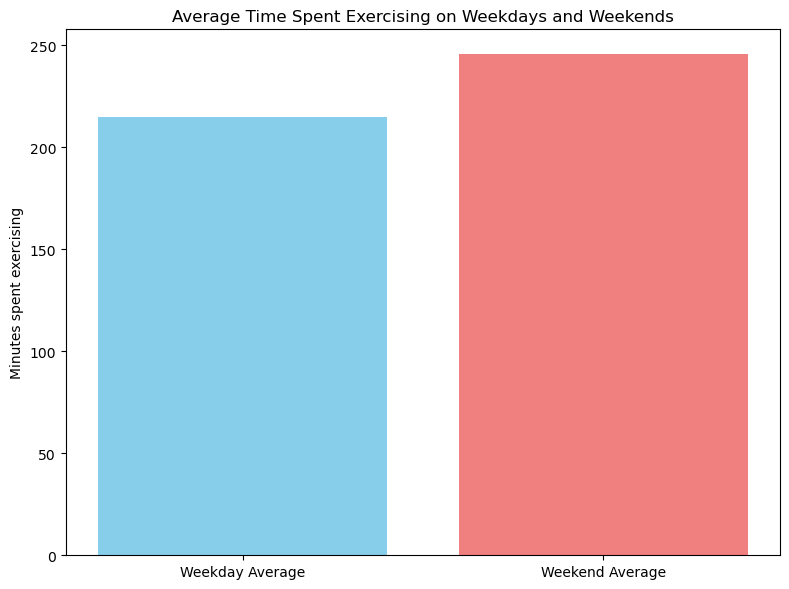

In [ ]:
# Create bar chart to show the proportion of weekday average vs weekend population proportion meeting guideline
plt.figure(figsize=(8,6))

plt.bar(["Weekday Average", "Weekend Average"], [weekday_ave, weekend_ave], color=["skyblue", "lightcoral"])
plt.ylabel("Minutes spent exercising")
plt.title("Average Time Spent Exercising on Weekdays and Weekends")
plt.tight_layout()
plt.show()

### Time-based exploration of Bar Chart
Taking the exploration a bit further, we looked at the average time spent exercising on weekends compared to time spent exercising during the week for the entire Fitbit cohort. It appears that the weekend average is more.

In [ ]:
w_day.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
92,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.0,0.00,4.43,0.0,0,0,339,1101,2030,1,339
93,1844505072,2016-04-13,4929,3.26,3.26,0.0,0.0,0.00,3.26,0.0,0,0,248,1192,1860,2,248
94,1844505072,2016-04-14,7937,5.25,5.25,0.0,0.0,0.00,5.23,0.0,0,0,373,843,2130,3,373
95,1844505072,2016-04-15,3844,2.54,2.54,0.0,0.0,0.00,2.54,0.0,0,0,176,527,1725,4,176
98,1844505072,2016-04-18,4597,3.04,3.04,0.0,0.0,0.48,2.56,0.0,0,12,217,1211,1814,0,229


In [ ]:
w_end.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,267
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,6,222
11,1503960366,2016-04-23,14371,9.04,9.04,0.0,2.81,0.87,5.36,0.0,41,21,262,732,1949,5,324
12,1503960366,2016-04-24,10039,6.41,6.41,0.0,2.92,0.21,3.28,0.0,39,5,238,709,1788,6,282
18,1503960366,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,5,303


In [ ]:
# test for normality
statistic1, p_value1 = stats.normaltest(sample_1_df["TotalActiveMin"])
statistic2, p_value2 = stats.normaltest(sample_2_df["TotalActiveMin"])

print(f'Normal Test - Sample 1: statistic={statistic1:.4f}, p-value={p_value1:.4f}')
print(f'Normal Test - Sample 2: statistic={statistic2:.4f}, p-value={p_value2:.4f}')

Normal Test - Sample 1: statistic=36.3456, p-value=0.0000
Normal Test - Sample 2: statistic=6.8509, p-value=0.0325


** The randomised sample sets were so small that I think it affects the normal test. Only 17 in each sample. With a larger sample I would have received much more accurate results. Everytime I run the code only 1 sample would occassionally satisfy the normal test. If p-value is > than 0.05 then there is evidence to support the assumption of normality. 

I also suspect that because this was data not from general public but from a particular population gathered during a study that the participants all aimed for 10000 steps, affecting the normal distribution of the data.

In [ ]:
# Independent T-test because only 2 groups, otherwise ANOVA

t_statistic, p_value = stats.ttest_ind(w_day.TotalActiveMin, w_end.TotalActiveMin, equal_var=False) # Welsh ttest because didnt verify if std devs =
stats.ttest_ind(w_day.TotalActiveMin, w_end.TotalActiveMin, equal_var=False) # Welsh ttest because didnt verify if std devs =

TtestResult(statistic=-2.6515870215256974, pvalue=0.00834199207317236, df=385.4705282734812)

In [ ]:
# if random sample changes the p-value then print relevant statement

if p_value < 0.05:
    print(f"T-test p-value is small ({p_value}) and less than significance level 0f 0.05, therefore we reject the null hypothesis")
else:
    print(f"T-test p-value is large ({p_value}) and greater than significance level 0f 0.05, therefore we fail to reject the null hypothesis")

T-test p-value is small (0.00834199207317236) and less than significance level 0f 0.05, therefore we reject the null hypothesis


### Time-based Analysis of Weekend Vs Weekday Times Spent Exercising
Taking the exploration a bit further, we looked at the average time spent exercising on weekends compared to time spent exercising during the week for the entire Fitbit cohort. After testing for normality and accounting for indepence by splitting the group randomly, we conducted an independent t-test (Welch T-test, specifically, assuming the variances of the two groups being compared is not equal) and found that the there is sufficient evidence to suggest that there is a statistically significant difference in the time engaged in physical activity between weekends and weekdays. We are in favour of the alternative hypothesis where Fitbit users exercise for longer time periods on weekends.

-------------------------------------------------------------------------------------------------------------------

### Looking to answer the initial proposal: does Fitbit inspire users to meet the recommended exercise guidelines?

**Question** Do fitbit users meet the weekly guideline more than the general population of Australia?

**Hypothesis** 
If activity level is influenced by wearing a Fitbit pedometer then Fitbit users will meet their minimum exercise guidleines of 30min of moderate activity for most days (5) of the week or (150min) more so than the general Australian population of 22.5%.

**Null Hypothesis** 
There is no significant difference in meeting their weekly guidelines compared to the general population

**Alternative Hypothesis** 
If activity level is influenced by wearing a Fitbit pedometer then fitbit users will meet their physical activity guidelines more than the general population.

In [ ]:
# Sum columns 11, 12
cleaned_data["ModVeryActiveTotal"] = cleaned_data["VeryActiveMinutes"] + cleaned_data["FairlyActiveMinutes"]
cleaned_data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek,TotalActiveMin,ModVeryActiveTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,366,38
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,257,40
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,3,222,41
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,4,272,63
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,5,267,46


In [ ]:
# Calculate total weekly minutes of moderate and very active activity for each user over the course of 6 weeks
total_weekly_activity = cleaned_data.groupby("Id")["ModVeryActiveTotal"].sum() / 6
weekly_activity_df = pd.DataFrame(total_weekly_activity)
weekly_activity_df.head()
# Add a column for the proportion of the sample meeting the guideline
weekly_activity_df["MeetsGuideline"] = weekly_activity_df["ModVeryActiveTotal"] >= 150
weekly_activity_df.head()

,ModVeryActiveTotal,MeetsGuideline
Id,,
1503960366,462.666667,True
1624580081,79.000000,False
1644430081,251.833333,True
1844505072,10.333333,False
1927972279,14.166667,False


In [ ]:
# calculate proportion meeting the guideline in the sample
proportion_meeting_sample = weekly_activity_df["MeetsGuideline"].mean()*100
population_mean = 22.5

# Print the proportion
print(f"Proportion Fitbit sample users meeting the guideline: {proportion_meeting_sample:.2f}% vs 22.5% for the population Australia")

Proportion Fitbit sample users meeting the guideline: 48.57% vs 22.5% for the population Australia


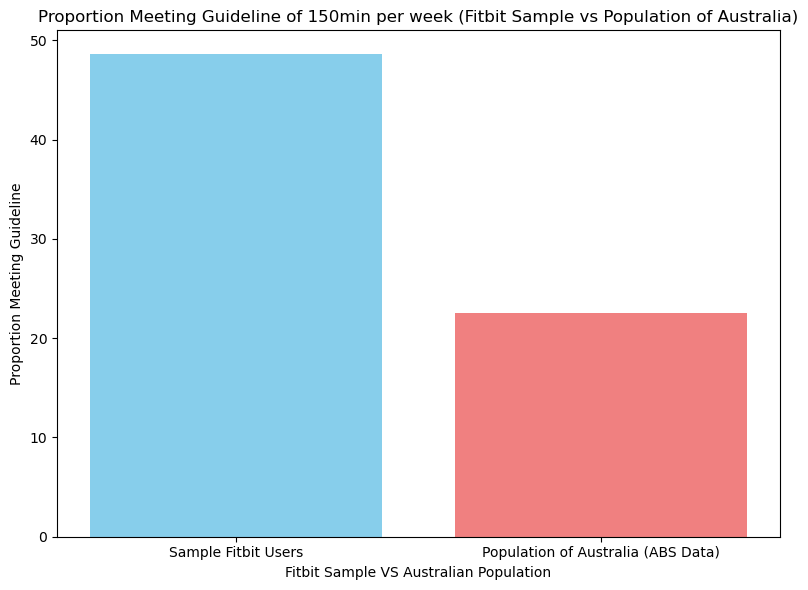

In [ ]:
# Create bar chart to show the proportion of sample vs the population proportion meeting guideline
plt.figure(figsize=(8,6))

plt.bar(["Sample Fitbit Users", "Population of Australia (ABS Data)"], [proportion_meeting_sample, population_mean], color=["skyblue", "lightcoral"])
plt.xlabel("Fitbit Sample VS Australian Population")
plt.ylabel("Proportion Meeting Guideline")
plt.title("Proportion Meeting Guideline of 150min per week (Fitbit Sample vs Population of Australia)")
plt.tight_layout()
plt.show()

### Analysis of initial proposal
The proportion of sample Fitbit users meeting the guideline: 48.57% vs 22.5% for the population Australia as per ABS 2022 data.

From here if I had the mean of the number of minutes that Australians exercise for on a weekly basis rather than the percentage, I could have performed a one sample t-test to see if the difference as measured in means, happen by chance or if it is statistically significant. 

I could have performed a z-test with the percentage population mean as it is known (22.5%) but we have not covered it yet in class.
Proportion Fitbit sample users meeting the guideline: 48.57% vs 22.5% for the population Australia

In [ ]:
# Ensure the activity_date column is in datetime format
cleaned_data["ActivityDate"] = pd.to_datetime(cleaned_data["ActivityDate"])

# Calculate the total number of activity dates for each ID
activity_counts = cleaned_data.groupby("Id")["ActivityDate"].nunique().reset_index()
activity_counts.columns = ["Id", "TotalActivityDates"]

# Calculate the total of all other columns for each ID
# Exclude the 'activity_date' column for the sum operation
columns_to_sum = cleaned_data.columns.difference(["ActivityDate"])

column_sums = cleaned_data[columns_to_sum].groupby("Id").sum().reset_index()

# Merge the two results
result = pd.merge(activity_counts, column_sums, on="Id")

# Rename columns to include the word 'Total' in each column header
result.columns = ['Sum' + col if col != 'Id' else col for col in result.columns]

# Display the final result
print(result)

            Id  SumTotalActivityDates  SumCalories  SumDayOfWeek  \
0   1503960366                     49        90437           148   
1   1624580081                     49        71689           148   
2   1644430081                     40       113503           123   
3   1844505072                     42        68169           127   
4   1927972279                     42        94405           127   
5   2022484408                     42       107513           127   
6   2026352035                     42        64026           127   
7   2320127002                     42        71834           127   
8   2347167796                     32        67102            95   
9   2873212765                     42        79775           127   
10  2891001357                      8        18187            22   
11  3372868164                     30        57265            99   
12  3977333714                     41        62187           124   
13  4020332650                     62       1723

In [ ]:
# Add new column for total active minutes
result["TotalActiveMinutes"] = result["SumFairlyActiveMinutes"] + result["SumLightlyActiveMinutes"] + result["SumVeryActiveMinutes"]

# Add new column for total active distance
result["TotalActiveDistance"] = result["SumLightActiveDistance"] + result["SumModeratelyActiveDistance"] + result["SumVeryActiveDistance"]

# Display the final result with new columns
print(result)

            Id  SumTotalActivityDates  SumCalories  SumDayOfWeek  \
0   1503960366                     49        90437           148   
1   1624580081                     49        71689           148   
2   1644430081                     40       113503           123   
3   1844505072                     42        68169           127   
4   1927972279                     42        94405           127   
5   2022484408                     42       107513           127   
6   2026352035                     42        64026           127   
7   2320127002                     42        71834           127   
8   2347167796                     32        67102            95   
9   2873212765                     42        79775           127   
10  2891001357                      8        18187            22   
11  3372868164                     30        57265            99   
12  3977333714                     41        62187           124   
13  4020332650                     62       1723

In [ ]:
# Calculate the average of each column
averages = result.mean()
# Exclude the Id column
averages_excluding_id = averages.drop("Id")
# Format the values to 4 decimal places
averages_formatted = averages_excluding_id.round(4)
print(averages_formatted)

SumTotalActivityDates              39.2286
SumCalories                     90456.3714
SumDayOfWeek                      118.7143
SumFairlyActiveMinutes            534.9714
SumLightActiveDistance            127.4626
SumLightlyActiveMinutes          7399.0286
SumLoggedActivitiesDistance         5.2480
SumModVeryActiveTotal            1320.4571
SumModeratelyActiveDistance        21.4923
SumSedentaryActiveDistance          0.0680
SumSedentaryMinutes             39616.6286
SumTotalActiveMin                8719.4857
SumTotalDistance                  208.3300
SumTotalSteps                  290611.8571
SumTrackerDistance                207.2437
SumVeryActiveDistance              55.7769
SumVeryActiveMinutes              785.4857
TotalActiveMinutes               8719.4857
TotalActiveDistance               204.7317
dtype: float64


In [ ]:
# Define recommended guidelines
# rec dail activity in mins
rec_mins_pw = 90

# Rec daily steps
rec_daily_steps = 10000

In [ ]:
# Calculate average daily active minutes and daily steps
result['AverageDailyActiveMinutes'] = result['TotalActiveMinutes'] / result['SumTotalActivityDates']
result['AverageDailySteps'] = result['SumTotalSteps'] / result['SumTotalActivityDates']

# Determine if they met the recommended daily active minutes and step count
result['Met daily rec activity mins'] = result['AverageDailyActiveMinutes'] >= rec_mins_pw
result['Met daily rec step count'] = result['AverageDailySteps'] >= rec_daily_steps

# Convert boolean values to 'TRUE'/'FALSE'
result['Met daily rec activity mins'] = result['Met daily rec activity mins'].apply(lambda x: 'TRUE' if x else 'FALSE')
result['Met daily rec step count'] = result['Met daily rec step count'].apply(lambda x: 'TRUE' if x else 'FALSE')

# Count the number of 'TRUE' values in the specified columns
true_activity_mins_count = result['Met daily rec activity mins'].value_counts().get('TRUE', 0)
true_step_count = result['Met daily rec step count'].value_counts().get('TRUE', 0)

# Print the counts
print(f"Number of ID's meeting recommended daily active minutes: {true_activity_mins_count}")
print(f"Number of ID's meeting recommended daily step count: {true_step_count}")

# Display the final result
print(result)

# convert to csv
#result.to_csv("result.csv", index=False)

Number of ID's meeting recommended daily active minutes: 32
Number of ID's meeting recommended daily step count: 7
            Id  SumTotalActivityDates  SumCalories  SumDayOfWeek  \
0   1503960366                     49        90437           148   
1   1624580081                     49        71689           148   
2   1644430081                     40       113503           123   
3   1844505072                     42        68169           127   
4   1927972279                     42        94405           127   
5   2022484408                     42       107513           127   
6   2026352035                     42        64026           127   
7   2320127002                     42        71834           127   
8   2347167796                     32        67102            95   
9   2873212765                     42        79775           127   
10  2891001357                      8        18187            22   
11  3372868164                     30        57265            99   
1

# Correlation between
- LightlyActiveMinutes vs. LightActiveDistance
- FairlyActiveMinutes vs. ModeratelyActiveDistance
- VeryActiveMinutes vs. VeryActiveDistance
- AllActiveMinutes vs. AllActiveDistance

Correlations between activity minutes and distances:
LightlyActiveMinutes vs. LightActiveDistance: 0.8762935452942788
FairlyActiveMinutes vs. ModeratelyActiveDistance: 0.6979928705143341
VeryActiveMinutes vs. VeryActiveDistance: 0.8348675153819457
AllActiveMinutes vs. AllActiveDistance: 0.7539476699627684
R-squared - LightlyActiveMinutes vs. LightActiveDistance: 0.7678903775244159


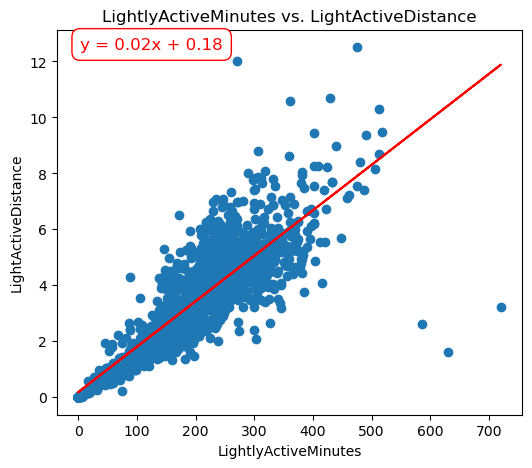

R-squared - FairlyActiveMinutes vs. ModeratelyActiveDistance: 0.487194047288842


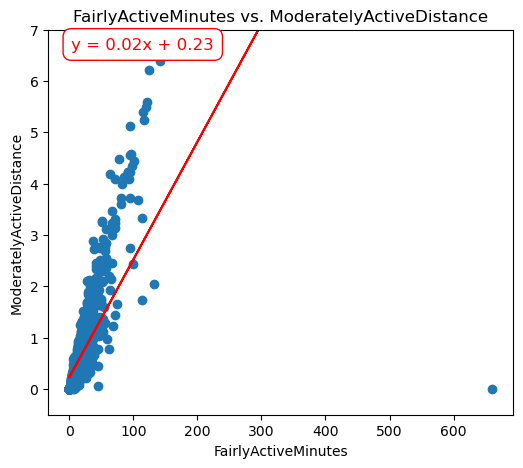

R-squared - VeryActiveMinutes vs. VeryActiveDistance: 0.6970037682400282


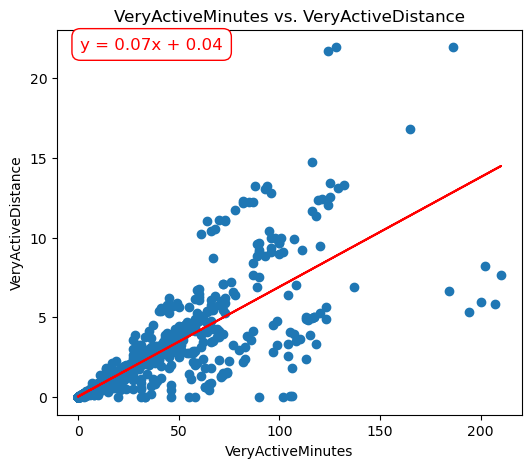

R-squared - AllActiveMinutes vs. AllActiveDistance: 0.5684370890422877


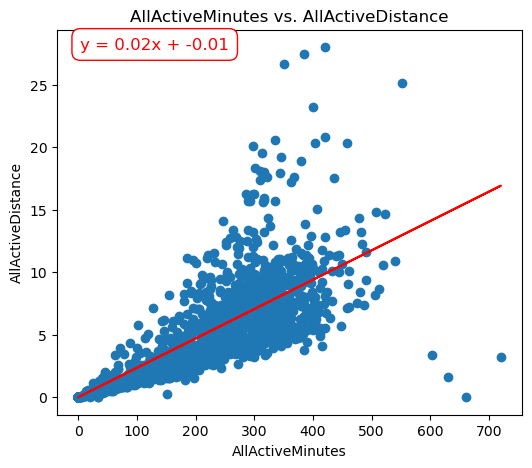

In [ ]:
# Calculate all active minutes and all active distance and add to df
cleaned_data['AllActiveMinutes'] = cleaned_data['LightlyActiveMinutes'] + cleaned_data['FairlyActiveMinutes'] + cleaned_data['VeryActiveMinutes']
cleaned_data['AllActiveDistance'] = cleaned_data['LightActiveDistance'] + cleaned_data['ModeratelyActiveDistance'] + cleaned_data['VeryActiveDistance']

# Calculate the correlations between ActiviteMinutes vs ActiviteDistance
correlations = {
    'LightlyActiveMinutes vs. LightActiveDistance': cleaned_data[['LightlyActiveMinutes', 'LightActiveDistance']].corr().iloc[0, 1],
    'FairlyActiveMinutes vs. ModeratelyActiveDistance': cleaned_data[['FairlyActiveMinutes', 'ModeratelyActiveDistance']].corr().iloc[0, 1],
    'VeryActiveMinutes vs. VeryActiveDistance': cleaned_data[['VeryActiveMinutes', 'VeryActiveDistance']].corr().iloc[0, 1],
    'AllActiveMinutes vs. AllActiveDistance': cleaned_data[['AllActiveMinutes', 'AllActiveDistance']].corr().iloc[0, 1]
}

print("Correlations between activity minutes and distances:")
for key, value in correlations.items():
    print(f"{key}: {value}")

# LightlyActiveMinutes vs. LightActiveDistance
plt.figure(figsize=(6, 5))
plt.scatter(cleaned_data['LightlyActiveMinutes'], cleaned_data['LightActiveDistance'])
plt.xlabel('LightlyActiveMinutes')
plt.ylabel('LightActiveDistance')
plt.title('LightlyActiveMinutes vs. LightActiveDistance')
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data['LightlyActiveMinutes'], cleaned_data['LightActiveDistance'])
print(f"R-squared - LightlyActiveMinutes vs. LightActiveDistance: {r_value**2}")
plt.plot(cleaned_data['LightlyActiveMinutes'], intercept + slope * cleaned_data['LightlyActiveMinutes'], color='red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
#plt.savefig('LightlyActiveMinutes_vs_LightActiveDistance.png')
plt.show()

# FairlyActiveMinutes vs. ModeratelyActiveDistance
plt.figure(figsize=(6, 5))
plt.scatter(cleaned_data['FairlyActiveMinutes'], cleaned_data['ModeratelyActiveDistance'])
plt.xlabel('FairlyActiveMinutes')
plt.ylabel('ModeratelyActiveDistance')
plt.title('FairlyActiveMinutes vs. ModeratelyActiveDistance')
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data['FairlyActiveMinutes'], cleaned_data['ModeratelyActiveDistance'])
print(f"R-squared - FairlyActiveMinutes vs. ModeratelyActiveDistance: {r_value**2}")
plt.plot(cleaned_data['FairlyActiveMinutes'], intercept + slope * cleaned_data['FairlyActiveMinutes'], color='red')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
# Set y-axis limits to make it smaller
plt.ylim(-0.5, 7) 
#plt.savefig('FairlyActiveMinutes_vs_ModeratelyActiveDistance.png')
plt.show()

# VeryActiveMinutes vs. VeryActiveDistance
plt.figure(figsize=(6, 5))
plt.scatter(cleaned_data['VeryActiveMinutes'], cleaned_data['VeryActiveDistance'])
plt.xlabel('VeryActiveMinutes')
plt.ylabel('VeryActiveDistance')
plt.title('VeryActiveMinutes vs. VeryActiveDistance')
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data['VeryActiveMinutes'], cleaned_data['VeryActiveDistance'])
plt.plot(cleaned_data['VeryActiveMinutes'], intercept + slope * cleaned_data['VeryActiveMinutes'], color='red')
print(f"R-squared - VeryActiveMinutes vs. VeryActiveDistance: {r_value**2}")
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
#plt.savefig('VeryActiveMinutes_vs_VeryActiveDistance.png')
plt.show()

# AllActiveMinutes vs. AllActiveDistance
plt.figure(figsize=(6, 5))
plt.scatter(cleaned_data['AllActiveMinutes'], cleaned_data['AllActiveDistance'])
plt.xlabel('AllActiveMinutes')
plt.ylabel('AllActiveDistance')
plt.title('AllActiveMinutes vs. AllActiveDistance')
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data['AllActiveMinutes'], cleaned_data['AllActiveDistance'])
plt.plot(cleaned_data['AllActiveMinutes'], intercept + slope * cleaned_data['AllActiveMinutes'], color='red')
print(f"R-squared - AllActiveMinutes vs. AllActiveDistance: {r_value**2}")
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
#plt.savefig('AllActiveMinutes_vs_AllActiveDistance.png')
plt.show()

# Analysis

All the graphs show there is a atrong positive correaltion between active minutes and the corresponding distances for light and very active activities, and a moderate positive correlation for moderate activities. This indicates that there is a correlation between active distances and active minutes and that as users spend more time being active, they cover more distance, showing consistent tracking by Fitbit.

The data indicates that users are engaging in various levels of activity, and Fitbit is accurately capturing these activities, which can motivate users to continue meeting or exceeding their exercise goals if they know there steps are being tracked consistently.

Users who spend more time in lightly active minutes tend to cover more distance. This suggests that light activities, like walking, are consistently tracked and directly proportional to the duration spent. Users who engage in very active minutes typically cover significant distances. This strong correlation suggests that very active activities are consistently tracked and that the duration spent on these activities is a good indicator of the distance covered.

The strong correlations and consistent tracking suggest that having a Fitbit inspires users to be more active, as they can reliably track their activity minutes and distances. 
Overall, the analysis supports the idea that Fitbit is an effective tool for tracking and inspiring physical activity, helping users to meet their exercise goals by providing accurate and reliable data on their activity levels.

However, the spread of users who spend more total active minutes (sum of light, fairly, and very active minutes) indicates that the relationship is not perfectly linear, possibly due to differences in individual activity patterns and intensities.

# Distribution of TotalSteps against TotalActiveMinutes

Slope: 31.39884517130186
Intercept: 421.65542801127776
R-squared: 0.6010558569437321
P-value: 1.1915076931267748e-280
Standard Error: 0.6848969016344354


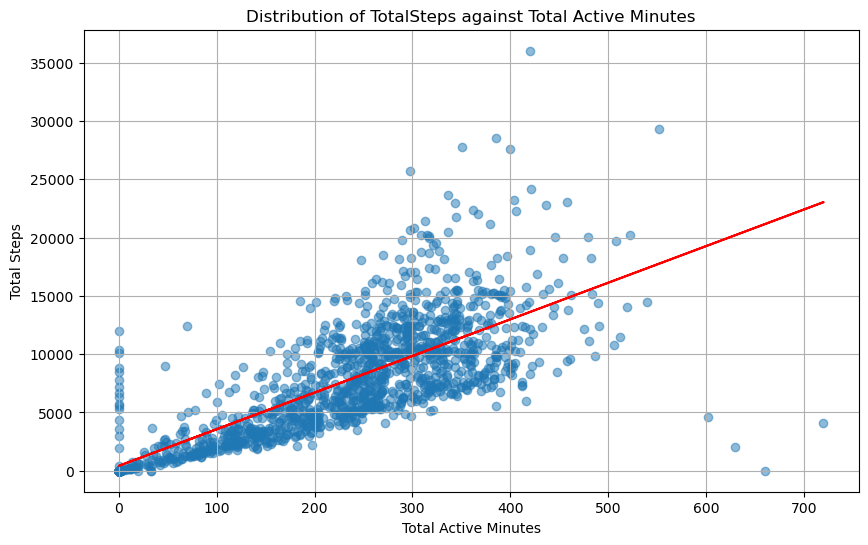

In [ ]:
# Calculate total active minutes
cleaned_data['TotalActiveMinutes'] = cleaned_data['LightlyActiveMinutes'] + cleaned_data['FairlyActiveMinutes'] + cleaned_data['VeryActiveMinutes']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_data['TotalActiveMinutes'], cleaned_data['TotalSteps'])
# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot the distribution of TotalSteps against TotalActiveMinutes
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['TotalActiveMinutes'], cleaned_data['TotalSteps'], alpha=0.5)
plt.title('Distribution of TotalSteps against Total Active Minutes')
plt.xlabel('Total Active Minutes')
plt.ylabel('Total Steps')
plt.grid(True)

# Plot the linear regression line
plt.plot(cleaned_data['TotalActiveMinutes'], intercept + slope * cleaned_data['TotalActiveMinutes'], color='red', label=f'Linear regression line (slope={slope:.2f}, intercept={intercept:.2f})')

#plt.savefig('Distribution_of_TotalSteps_against_Total_Active_Minutes.png')

plt.show()

# Analysis

This scatter plot displays the relationship between TotalSteps and Total Active Minutes (sum of LightlyActiveMinutes, FairlyActiveMinutes, and VeryActiveMinutes) with each point representing a day's data, plotting the total number of steps against the total active minutes for that day.

There is a positive correlation between TotalSteps and Total Active Minutes so As Total Active Minutes increase, the number of TotalSteps generally increases.

Most data points are densely clustered between 0 and 400 Total Active Minutes and 0 and 15,000 Total Steps.
This clustering indicates that the majority of users tend to have between 0 to 300 active minutes per day and accumulate between 0 to 15,000 steps.

There are some outliers with very high Total Active Minutes (600-700 minutes) but with lower than expected step counts.
The distribution also shows some strange data where even though the total active minutes is 0, steps were recorded. This would indicate either falsely recorded data via user input or a malfunction in the Fitbit.

The spread of the points indicates variability, suggesting that other factors might also play a significant role. Such as erroneous data inputs or collections from Fitbit and varying fitness levels of users.

# Hypothesis question

Is there a significant difference in the average active distances (Light, Moderate, and Very Active) between the first 7 days and the last 7 days of the survey to see if users improved over the duration of the survey?

* Null Hypothesis: There is no significant difference in the average Active Distance between the first 7 days and the last 7 days.

* Alternative Hypothesis: There is a significant difference in the average  Active Distance between the first 7 days and the last 7 days.

T-test for LightActiveDistance: t-statistic = 0.16990464574705405, p-value = 0.8660920770540905
T-test for ModerateActiveDistance: t-statistic = 0.1442947288458064, p-value = 0.886119662006992
T-test for VeryActiveDistance: t-statistic = 1.2539188878613425, p-value = 0.21842472130892082


<Figure size 1200x600 with 0 Axes>

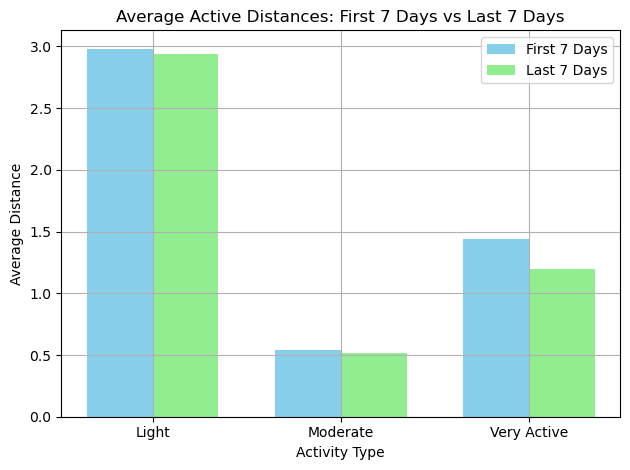

In [ ]:
# Convert the date column to datetime format
cleaned_data['ActivityDate'] = pd.to_datetime(cleaned_data['ActivityDate'])

# Function to calculate the average distances for the first and last 7 days
def calculate_first_last_avg_distances(df):
    df = df.sort_values('ActivityDate')
    first_7_days = df.head(7)
    last_7_days = df.tail(7)
    return pd.Series({
        'First7_LightActiveDistance': first_7_days['LightActiveDistance'].mean(),
        'First7_ModerateActiveDistance': first_7_days['ModeratelyActiveDistance'].mean(),
        'First7_VeryActiveDistance': first_7_days['VeryActiveDistance'].mean(),
        'Last7_LightActiveDistance': last_7_days['LightActiveDistance'].mean(),
        'Last7_ModerateActiveDistance': last_7_days['ModeratelyActiveDistance'].mean(),
        'Last7_VeryActiveDistance': last_7_days['VeryActiveDistance'].mean()
    })

# Calculate the average distances for the first and last 7 days for each user
user_avg_distances = cleaned_data.groupby('Id').apply(calculate_first_last_avg_distances)

# Perform paired t-tests
t_test_results = {}
for activity in ['LightActiveDistance', 'ModerateActiveDistance', 'VeryActiveDistance']:
    t_stat, p_val = stats.ttest_rel(user_avg_distances[f'First7_{activity}'], user_avg_distances[f'Last7_{activity}'])
    t_test_results[activity] = (t_stat, p_val)

# Print t-test results
for activity, (t_stat, p_val) in t_test_results.items():
    print(f"T-test for {activity}: t-statistic = {t_stat}, p-value = {p_val}")

# Visualize the average distances for the first and last 7 days
average_distances = user_avg_distances.mean()

plt.figure(figsize=(12, 6))
x = np.arange(3)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [average_distances[f'First7_{activity}'] for activity in ['LightActiveDistance', 'ModerateActiveDistance', 'VeryActiveDistance']],
                width, label='First 7 Days', color='skyblue')
rects2 = ax.bar(x + width/2, [average_distances[f'Last7_{activity}'] for activity in ['LightActiveDistance', 'ModerateActiveDistance', 'VeryActiveDistance']],
                width, label='Last 7 Days', color='lightgreen')

ax.set_xlabel('Activity Type')
ax.set_ylabel('Average Distance')
ax.set_title('Average Active Distances: First 7 Days vs Last 7 Days')
ax.set_xticks(x)
ax.set_xticklabels(['Light', 'Moderate', 'Very Active'])
ax.legend()

fig.tight_layout()
plt.grid(True)

#plt.savefig('average_active_distances_hypo_test.png')

plt.show()

# Analysis
T-Test Results:

P-values for all activity types are greater than 0.05: This indicates that there is no statistically significant difference between the first 7 days and the last 7 days for light active distance, moderate active distance, and very active distance.
T-statistics are relatively low: This further supports the conclusion that there are no significant differences in the average active distances over time.
Visualization:

Light Active Distance:
The average light active distance slightly decreased from the first 7 days (approx. 2.8) to the last 7 days (approx. 2.7). However, the decrease is very small.
Moderate Active Distance:
The average moderate active distance remained nearly the same from the first 7 days to the last 7 days (approx. 0.5).
Very Active Distance:
The average very active distance slightly increased from the first 7 days (approx. 1.2) to the last 7 days (approx. 1.5). This increase, while noticeable in the bar plot, is not statistically significant according to the t-test results.
Conclusion
Based on the t-test results and the visualization:

No Significant Increase or Decrease:

There is no statistically significant increase or decrease in the average active distances (light, moderate, very active) from the first 7 days to the last 7 days of the dataset.
Consistency in Activity Levels:

The average distances for light and moderate activities remained relatively consistent over time, suggesting that users maintained their activity levels throughout the survey duration.
Slight Increase in Very Active Distance:

Although there was a slight increase in the average very active distance, this change was not statistically significant. This suggests that while some users might have increased their very active minutes, the overall trend did not show a significant improvement. Possibly with a larger time frame some significant differences and changes can be observed.

### Intro: The 10,000 step goal by Aisling Geraghty

Fitbit advertises 10,000 steps as the goal all users should seek to attain daily. By purchasing a fitbit, users are choosing to engage with a fitness tool that measures their steps as a form of activity. Here we look at how users performed with regards to the 10,000 steps daily goal that is encouraged by fitbit. The use of steps as a metric is then further explored by breaking step ranges into activity levels, whereby the distribution of users is explored by their average step activity. Using chi-squared, the variation of users by step activity is tested for statistical significance. 

Through this analysis we are looking to discover the appropriateness of the 10,000 steps goal, how achievable was it? We are looking to see if there is an even spread of user types within the sample, or whether those purchasing a fitbit favoured a specific range of steps. Lastly, we will compare the activity levels by step of this sample size with results from the Australian Bureau of Statistics, to see how those who have chosen to measure their steps compare in activity with the general population. 


In [ ]:
##START OF AISLING'S PART
#Extract relevant columns for my tests
activity_levels = cleaned_data[["Id","TotalSteps","VeryActiveMinutes","FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes"]]
activity_levels.head()
activity_levels.to_excel("activity_levels.xlsx",)

In [ ]:
### Part 1
### HOW MANY REACHED THE GOAL OF 10,000 STEPS, AND WHAT WERE THE AVERAGE STEPS 
goal_reached = activity_levels.loc[activity_levels["TotalSteps"] >= 10000, ["Id", "TotalSteps"]]
goal_reached.head()
count_reached = len(goal_reached)
print(count_reached)
goal_reached


430


,Id,TotalSteps
0,1503960366,13162
1,1503960366,10735
2,1503960366,10460
4,1503960366,12669
6,1503960366,13019
...,...,...
1391,8877689391,10910
1392,8877689391,23014
1393,8877689391,16470
1394,8877689391,28497


In [ ]:
## percentage of entrees that met this goal 
##RESULT 1
successful_days = f"{430/1397:.0%}"
print(successful_days)

31%


In [ ]:
###number of individuals reaching goal 
no_individuals = len(pd.unique(goal_reached['Id']))
no_individuals 


26

In [ ]:
##RESULT 2
###percentage of participants that reached the 10,000 steps goal 
percentage_participants = f"{26/35:0%}"
print(percentage_participants)


74.285714%


In [ ]:
##Result 3
##Average steps of users
average_steps_overall = activity_levels['TotalSteps'].mean()
print(average_steps_overall)


7280.898353614889


In [ ]:
#### results table 

steps_results = {
    'Percentage of time goal was met': [successful_days],
    'Percentage of participants that reached goal': [percentage_participants],
    'Average steps taken' : [average_steps_overall],
}

steps_results

steps_table = pd.DataFrame(data=steps_results)
steps_table 
##NOTES MAKE TO ONE DECIMAL PLACE 

,Percentage of time goal was met,Percentage of participants that reached goal,Average steps taken
0,31%,74.285714%,7280.898354


Notation:
This results table extracts some key findings. 31% of entrees achieved the 10,000 step goal. This is a substantial enough number that presents the goal as relatively achievable. Furthermore, 74% of participants reached the goal at least once, showing that a majority of users rose to the challenge. 
On average, the total steps of users was still high, falling short of 10,000 by 2720 steps. Given that the data was accumulated over a short timeframe, the gap between the average steps taken, and fitbit's goal, could likely be closed by the majority of users, if given more time to interact with the tool. 

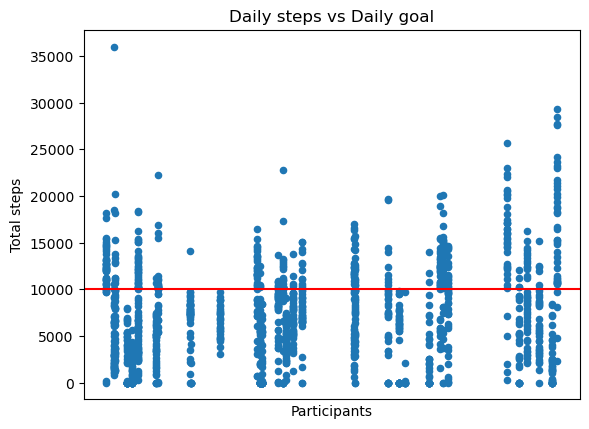

In [ ]:
###Part 2 graph building 
import matplotlib.pyplot as plt

activity_levels.plot.scatter(x='Id', y='TotalSteps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')
plt.xlabel('Participants')
plt.ylabel('Total steps')
plt.title('Daily steps vs Daily goal')
plt.tick_params(labelbottom = False, bottom = False)





Analysis

This graph shows the daily step entrees of each participant, and a threshold line for the 10,000 steps goal. The data shows huge variation in the daily steps of users, as well as clear incidents of abnormal levels of activity, such as the entry of over 35000 steps for one day. The entries are more clustered and dense beneath the 10,000 mark, which is where 79% of entries are situated. 

From the spread of data, it is clear that users showed variation in their activity levels, and that most users achieved the goal at least once. 
Given that 31% of entrees reached the goal, it is clear the goal is achievable but not easy. The achievable nature is substantiated by the majority reaching, and/or exceeding the goal at least once within a short study.

Given that the 10,000 step goal is 2720 steps above the average, it poses itself as a challenge that is not out of reach to obtain, but seemingly difficult to maintain. 


In [ ]:
##### PART 2 Graphical depiction 
### Average steps per person

average_steps = cleaned_data.groupby('Id', as_index=False).agg(Average_steps=pd.NamedAgg(column='TotalSteps', aggfunc='mean'))
#average_steps = cleaned_data.groupby("Id")["TotalSteps"].mean()
#average_steps.head()

average_steps

## 
#total_steps_perperson = activity_levels.groupby("Id")["TotalSteps"].sum()
#total_steps_perperson 


,Id,Average_steps
0,1503960366,11935.780000
1,1624580081,5167.200000
2,1644430081,7780.925000
3,1844505072,2876.023256
4,1927972279,1269.069767
5,2022484408,11595.093023
6,2026352035,4960.139535
7,2320127002,4276.372093
8,2347167796,9647.121212
9,2873212765,7299.255814


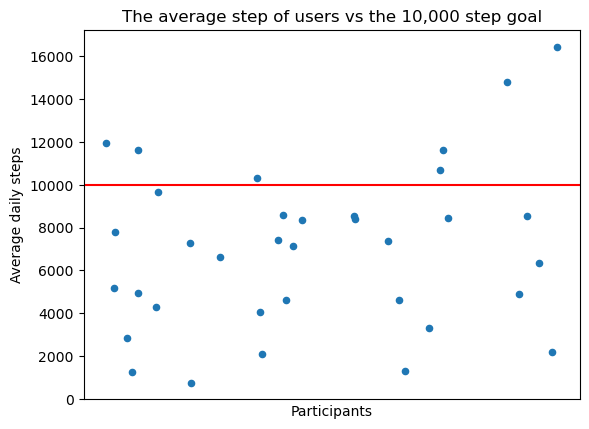

In [ ]:


average_steps.plot.scatter(x='Id', y='Average_steps')
plt.axhline(y = 10000, color = 'r', linestyle = '-')
plt.xlabel("Participants")
plt.ylabel("Average daily steps")
plt.title("The average step of users vs the 10,000 step goal")
plt.tick_params(labelbottom = False, bottom = False)
plt.show()
          


    

Analysis

A graph showing the average daily steps per individual participant in relation to the 10,000 step goal. This graph is a clearer representation of the same findings in the previous graph, whereby each user is a distinct dot. However, the use of mean steps shows how consistently achievable the goal is. 20% of the participants met the goal consistently, with 80% of the participants falling beneath.
This further substantiates participants find fitbit's goal difficult to maintain. 
The quality of a goal that is difficult to maintain is commendable, as a goal that is too easy will likely produce less satisifaction. Furthermore, a goal that is out of reach, can also prevent people from trying. 
Overall, it appears that the fitbit goal of 10,000 steps presents an appropriate challenge for people to increase their activity levels and improve their health. 


In [ ]:
###Part 3 statistical testing 
##bringing down previous dataframes for ease
goal_reached
activity_levels


,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,13162,25,13,328,728
1,1503960366,10735,21,19,217,776
2,1503960366,10460,30,11,181,1218
3,1503960366,9762,29,34,209,726
4,1503960366,12669,36,10,221,773
...,...,...,...,...,...,...
1392,8877689391,23014,70,29,359,982
1393,8877689391,16470,90,9,289,1052
1394,8877689391,28497,128,46,211,1055
1395,8877689391,10622,18,7,225,1190


In [ ]:
###getting comparing activity populations and chi squared) 
def activity_user_type(TotalSteps):
    if TotalSteps < 5000:
        return "sedentary"
    elif 5000 <= TotalSteps <7500:
        return "lightly active"
    elif 7500 <= TotalSteps <10000:
        return "fairly active"
    else:
        return "very active"
average_steps['Activity User Type'] = average_steps['Average_steps'].apply(activity_user_type)
print(average_steps)




            Id  Average_steps Activity User Type
0   1503960366   11935.780000        very active
1   1624580081    5167.200000     lightly active
2   1644430081    7780.925000      fairly active
3   1844505072    2876.023256          sedentary
4   1927972279    1269.069767          sedentary
5   2022484408   11595.093023        very active
6   2026352035    4960.139535          sedentary
7   2320127002    4276.372093          sedentary
8   2347167796    9647.121212      fairly active
9   2873212765    7299.255814     lightly active
10  2891001357     773.625000          sedentary
11  3372868164    6616.933333     lightly active
12  3977333714   10321.523810        very active
13  4020332650    4049.761905          sedentary
14  4057192912    2103.972222          sedentary
15  4319703577    7422.813953     lightly active
16  4388161847    8595.692308      fairly active
17  4445114986    4632.369565          sedentary
18  4558609924    7154.930233     lightly active
19  4702921684    83

In [ ]:
###create poputions of user type
count_type = average_steps['Activity User Type'].value_counts().reset_index()
count_type.columns = ['Activity User Type', 'total']

count_type

## percentages
count_type['totals'] = count_type['total'].sum()
count_type['percent'] = count_type['total']/count_type['totals']
count_type


,Activity User Type,total,totals,percent
0,sedentary,13,35,0.371429
1,fairly active,8,35,0.228571
2,very active,7,35,0.200000
3,lightly active,7,35,0.200000


Notation:
The level of activity has been broken down into step ranges. Below 5,000 steps a day is considered sedentary. Between 5,000 and 7,500 is considered lightly active. Between 7,500-10,000, is considered fairly active. And very active is determined as those who exceeded 10,000 steps. 
The total collumn shows the number of participants whose average steps fell into each category. Sedentary users with less than 5000 steps were the largest population at 37% of participants. The other categories present near even results, with 1 more person performing fairly active step counts than very active and lightly active. Given the almost even spread of people in step categories, except for the sedentary people, a chi-square test can determine whether the larger number of sedentary users is a significantly different result from an even spread of user step activity. 

Alternative hypothesis: User showed a preference for a certain level of activity type.


Null hypothesis: differences seen in user type can be accounted for by random distribution.

In [ ]:
##Statistical test- is the variation in activity levels by step a chance distribution, or is there significant variation in sample activity levels by step?
count_type[1] = 8.75
count_type
count_type.columns = ["Activity User Type", "total", "totals", "percentage", "expected"]
count_type

,Activity User Type,total,totals,percentage,expected
0,sedentary,13,35,0.371429,8.75
1,fairly active,8,35,0.228571,8.75
2,very active,7,35,0.200000,8.75
3,lightly active,7,35,0.200000,8.75


In [ ]:
##CHI-SQUARE
import scipy.stats as stats
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [ ]:
stats.chisquare(count_type['total'], count_type['expected'])

Power_divergenceResult(statistic=2.828571428571429, pvalue=0.4188181226463754)

Chi-square results
the pvalue is greater than 5% and the chi-square values is lower than than the critical value. 
In this case, the variation seen (most clearly in the number of people categorised as sedentary) was not significantly different from an even spread of participants across activity levels, with the variation occurring by chance around 41.9% of the time. This suggests that the activity level of participants is random, accepting the null hypothesis. 

### Comparison of sample population with Australian popupulation

According to the Australian Bureau of Statis,a National Health Survey between 2011-2012 yielded the following percentages of the population falling under theses categories. 
Sedentary = 21%
lightly active = 35%
fairly active= 28%
very active = 15%



In [ ]:
##Making a df for Australian bureau if applied to the same number of participants 
##rounded the numbers up to make 35, as the percentages given only make up 99%
observed = pd.Series([7.4, 12.3, 10, 5.3], index= ["sedentary", "lightly active", "fairly active", "active"])
AB_df = pd.DataFrame([observed]).T
AB_df[1] = 8.75
AB_df.columns = ["observed", "expected"]
AB_df

,observed,expected
sedentary,7.4,8.75
lightly active,12.3,8.75
fairly active,10.0,8.75
active,5.3,8.75


In [ ]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [ ]:
stats.chisquare(AB_df['observed'], AB_df['expected'])

Power_divergenceResult(statistic=3.187428571428572, pvalue=0.36362027847809164)

Notation:
Again the chi-square value is lower than the critical value, and the p-value is greater than 5%, showing that the different activity levels of the Australian population in this study did not vary significantly from an even distribution. 

### Percentage comparison of fitbit users and Australian Bureau 

In [ ]:
#This_study = pd.Series([37, 20, 23, 20]), index= ["sedentary", "lightly active", "fairly active", "very active"]
#Percentage_comparison = pd.DataFrame([This_study]).T
#Percentage_comparison['Australian Bureau'] = [21, 35, 28,15]
#percentage_comparison
This_study = {'Fitbit sample (%)': pd.Series([37,20,23,20], 
                                         index=['sedentary', 'lightly active', 'fairly active', 'very active']),
              'Australian Bureau (%)': pd.Series([21, 35, 28, 15],
                                             index=['sedentary', 'lightly active', 'fairly active', 'very active'])}
Percentage_df = pd.DataFrame(This_study)
print(Percentage_df)



                Fitbit sample (%)  Australian Bureau (%)
sedentary                      37                     21
lightly active                 20                     35
fairly active                  23                     28
very active                    20                     15


Notation: Fitbit sample shows a greater percentage of sedentary users. Australian Bureau shows a greater number of lightly to fairly active people, with a small percentage performing lower for very active fitbit users. Overall, both distributions do not statistically vary from an even distribution. This suggests that the data obtained in this study is similar to that of the Australian population, with both showing a fairly even spread of activity levels. This is especially shown if you add up the fairly active and very active people across both populations, seeing that in both cases a category of fairly active to very active people made up 43% of the sample size, and the general Australian population. 

## Final Conclusions

How appropriate or achievable is the companies 10,000 step goal?
Overall, 10,000 steps appears to be an occassionally achievable goal, with the majority of users meeting the goal at least once. However, achieving this goal daily proved difficult, with just 20% managing consistent levels of active to very active steps. 

Did the fitbit users favour a steps bracket, or did they show even distribution in terms of activity?
Fitbit user activity levels by step did not vary significantly from an even distribution, showing that the fitbit users were not statistically more active or less active, and tended to have a fairly even spread across activity levels. 

How did fitbit activity levels by step compare with the Australian general popuplation?
Both Fitbit users and The general population appear to have a fairly even distribution of sedentary, active, fairly active, and very active people. This suggests that the step metric of activity is a good metric for measuring general activity, but does not suggest that purchasing a fitbit increased the populations general fitness in the time that the study was carried out.

Future considerations regarding Fitbit marketting and steps:
In order to encourage users to exercise more and to set FitBit users a part from the general population, Fitbit should utilise gradual goal increases with regards to the individual users' base fitness. By making goals more incremental, more user's might show improvement.

Fitbit should also assess how to keep people engaged with their step count, as consistency of use showed huge variance and goals were difficult to maintain on a regular basis. For those that generally exceed the goal, FitBit may also want to consider additional features or rewards that will keep them wanting to track their step take. 

